In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 56.0 MB/s eta 0:00:00


In [6]:
import math, random, copy, numpy as np
import sys
sys.path.append("drive/MyDrive/Colab Notebooks/molgen")
from language.language import Language
from language.dynamiclanguage import DynamicLanguage
from language.helm import Helm
from node.node import Node
from node.sentencenode import SentenceNode
from edgepredictor.edgepredictor import EdgePredictor
from edgepredictor.languagemodel import LanguageModel
from edgepredictor.gpt2lm import GPT2LM
from policy.policy import Policy
from policy.ucb import UCB
from policy.puct import PUCT
from reward.reward import Reward
from reward.logp_reward import LogP_reward
from searcher.mcts import MCTS

In [7]:
#load lang and model from file
import pickle
import torch
from transformers import GPT2LMHeadModel
from transformers import GPT2Config

lang_dir = "drive/MyDrive/Colab Notebooks/molgen/model/helm/helmlang_noperiod.lang"
with open(lang_dir, 'rb') as f:
    lang_helm = pickle.load(f)

model_dir = "drive/MyDrive/Colab Notebooks/molgen/model/helm/1.2m_noperiod"
epred = GPT2LM(lang = lang_helm, model_dir = model_dir)

Is CUDA available: True


In [8]:
import cProfile
reward = LogP_reward
reward_conf = {"null_reward": -1}
policy = UCB
policy_conf = {"c":0.01}
time_limit = 1200
max_rollouts = 15
max_generations = 1500
expansion_threshold = 0.995
root = SentenceNode.bos_node(lang_helm)

searcher = MCTS(edgepredictor=epred, reward=reward, reward_conf=reward_conf, rollout_limit=epred.max_length(), verbose=False)
cProfile.run('searcher.search(root=root, policy=policy, policy_conf=policy_conf, expansion_threshold=expansion_threshold, time_limit=time_limit)')
#cProfile.run('searcher.search(root=root, policy=policy, policy_conf=policy_conf, expansion_threshold=expansion_threshold, exhaust_backpropagate=False, max_generations=max_generations)')

ストリーミング出力は最後の 5000 行に切り捨てられました。
6798- time: 883.24, count_rollouts: 8667, reward: 0.5288519509314145, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.K.[dK].[am]}$$$$
6799- time: 883.29, count_rollouts: 8668, reward: 0.646365058633181, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y}$$$$
6800- time: 883.34, count_rollouts: 8669, reward: 0.6101121561925941, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y.[am]}$$$$
6801- time: 883.38, count_rollouts: 8670, reward: 0.645840762786997, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y.P}$$$$
6802- time: 883.43, count_rollouts: 8671, reward: 0.6285768997295476, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y.[dK]}$PEPTIDE1,PEPTIDE1,10:R2-1:R1$$$$
6803- time: 883.60, count_rollouts: 8672, reward: 0.6508546236745113, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y.[dP]}$PEPTIDE1,PEPTIDE1,10:R2-1:R1$$$$
6804- time: 883.75, count_rollouts: 8673, reward: 0.5852955375212927, mol: PEPTIDE1{[dL].W.I.[dW].[dW].[dW].W.M.Y.K.[am]}$$$$
6805- time: 883.81, count_rollouts: 8674, rew

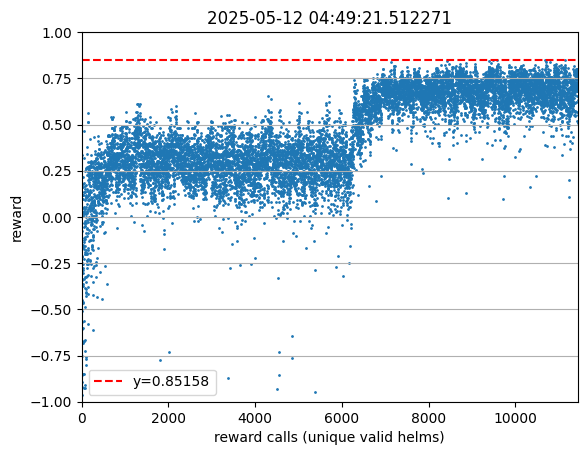

In [9]:
searcher.plot(type="reward_call", cutoff=None, maxline=True)

In [ ]:
#save mcts, change later
import pickle

with open("searcher", mode='wb') as fo:
    pickle.dump(searcher, fo)